In [1]:
import numpy as np 
import pandas as pd 
import ray

from optimize_multi.object_function import * 
from optimize_multi.optimizer_v2 import run_optimizer
from ryu_tool.mytool import * 

2023-05-08 20:05:39,102	INFO worker.py:1625 -- Started a local Ray instance.


In [2]:
price = pd.read_pickle("Data/allstock_reduced.pickle").abs()
spx_mask = pd.read_pickle("Data/spx_mask.pickle")

rtn = price.pct_change(fill_method=None)

In [3]:
rtn_ray = ray.put(rtn)
mask_ray = ray.put(spx_mask)

In [4]:
futures = [run_optimizer.remote(obj_sharpe, 
                                rtn_ray,
                                mask_ray,
                                "2007",
                                "2023",
                                "Q",
                                120,
                                a) for a in ["None","linear","constant"]]# clipping

In [5]:
result = ray.get(futures)

100%|██████████| 64/64 [10:02<00:00,  9.41s/it]


(run_optimizer pid=672) Jobs Done...


100%|██████████| 64/64 [14:28<00:00, 13.57s/it]


(run_optimizer pid=21656) Jobs Done...


 98%|█████████▊| 63/64 [17:57<00:12, 12.89s/it]


In [6]:
ray.shutdown()

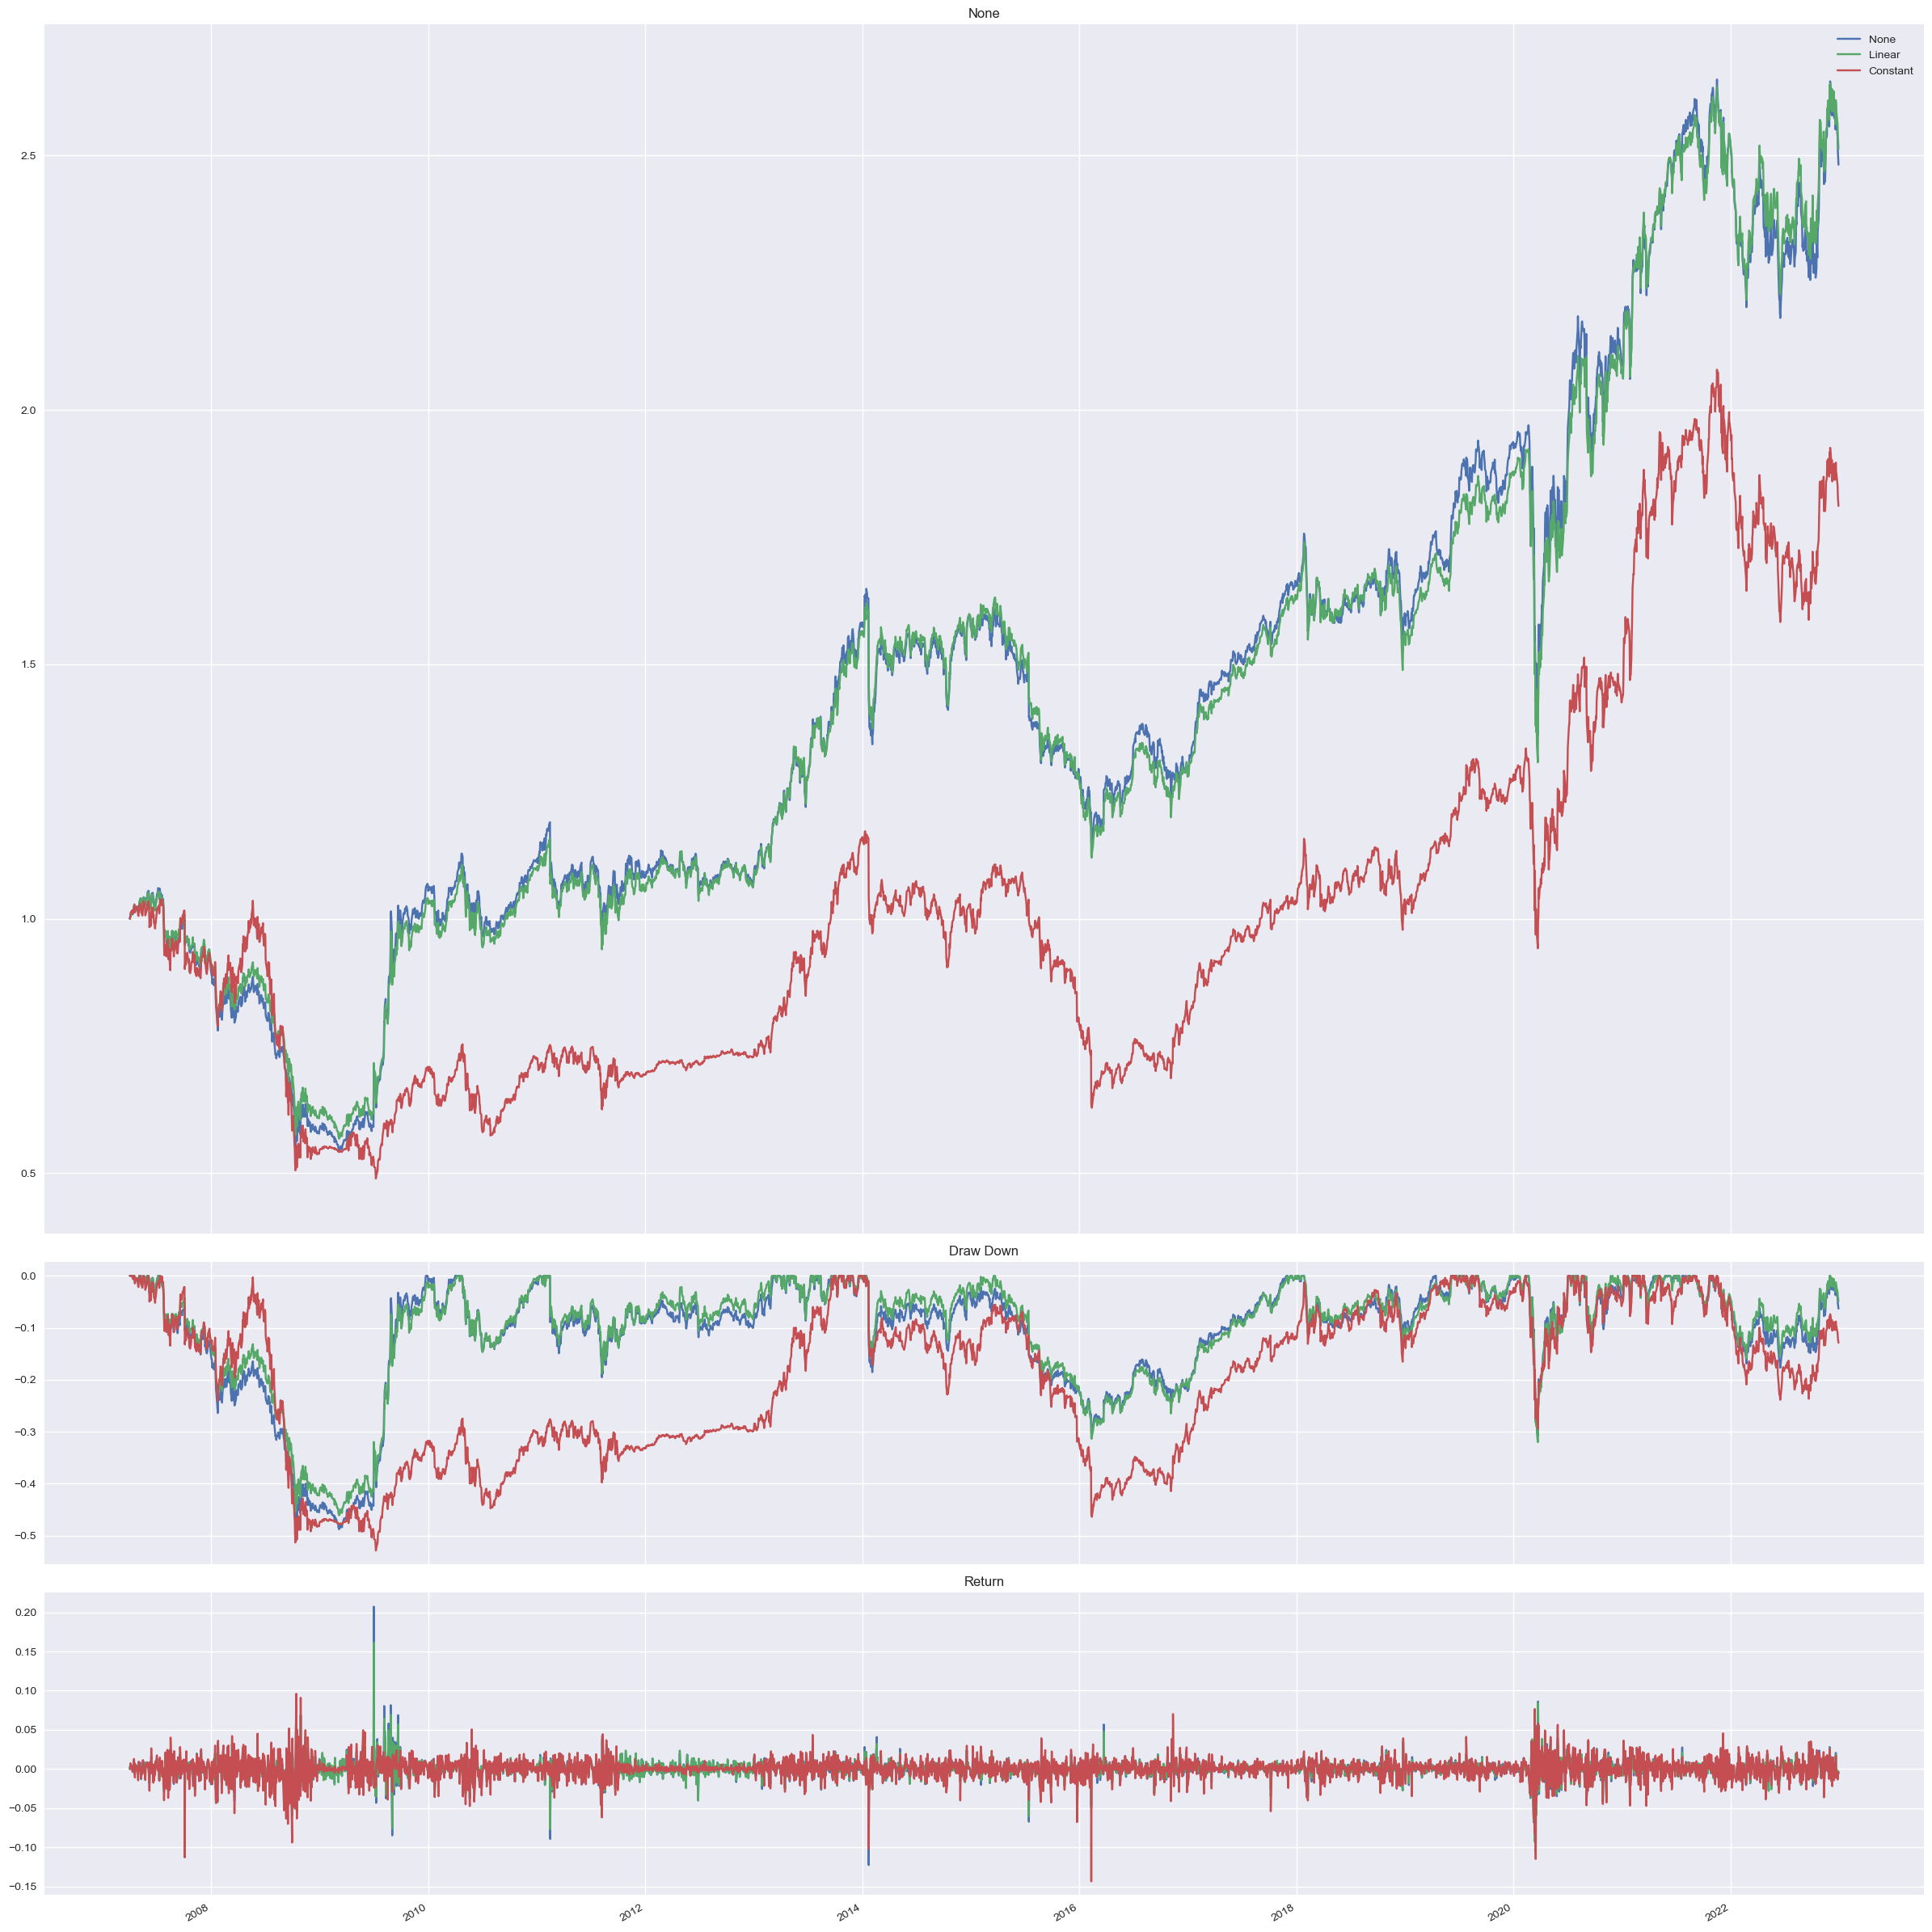

In [8]:
a0,b0 = simulate_rebalancing(rtn, result[0])
a1,b1 = simulate_rebalancing(rtn, result[1])
a2,b2 = simulate_rebalancing(rtn, result[2])
#a3,b3 = simulate_rebalancing(rtn, result[2])

draw_return_result({"None":a0,
                    "Linear":a1,
                    "Constant":a2
                    }, one_plot=True);

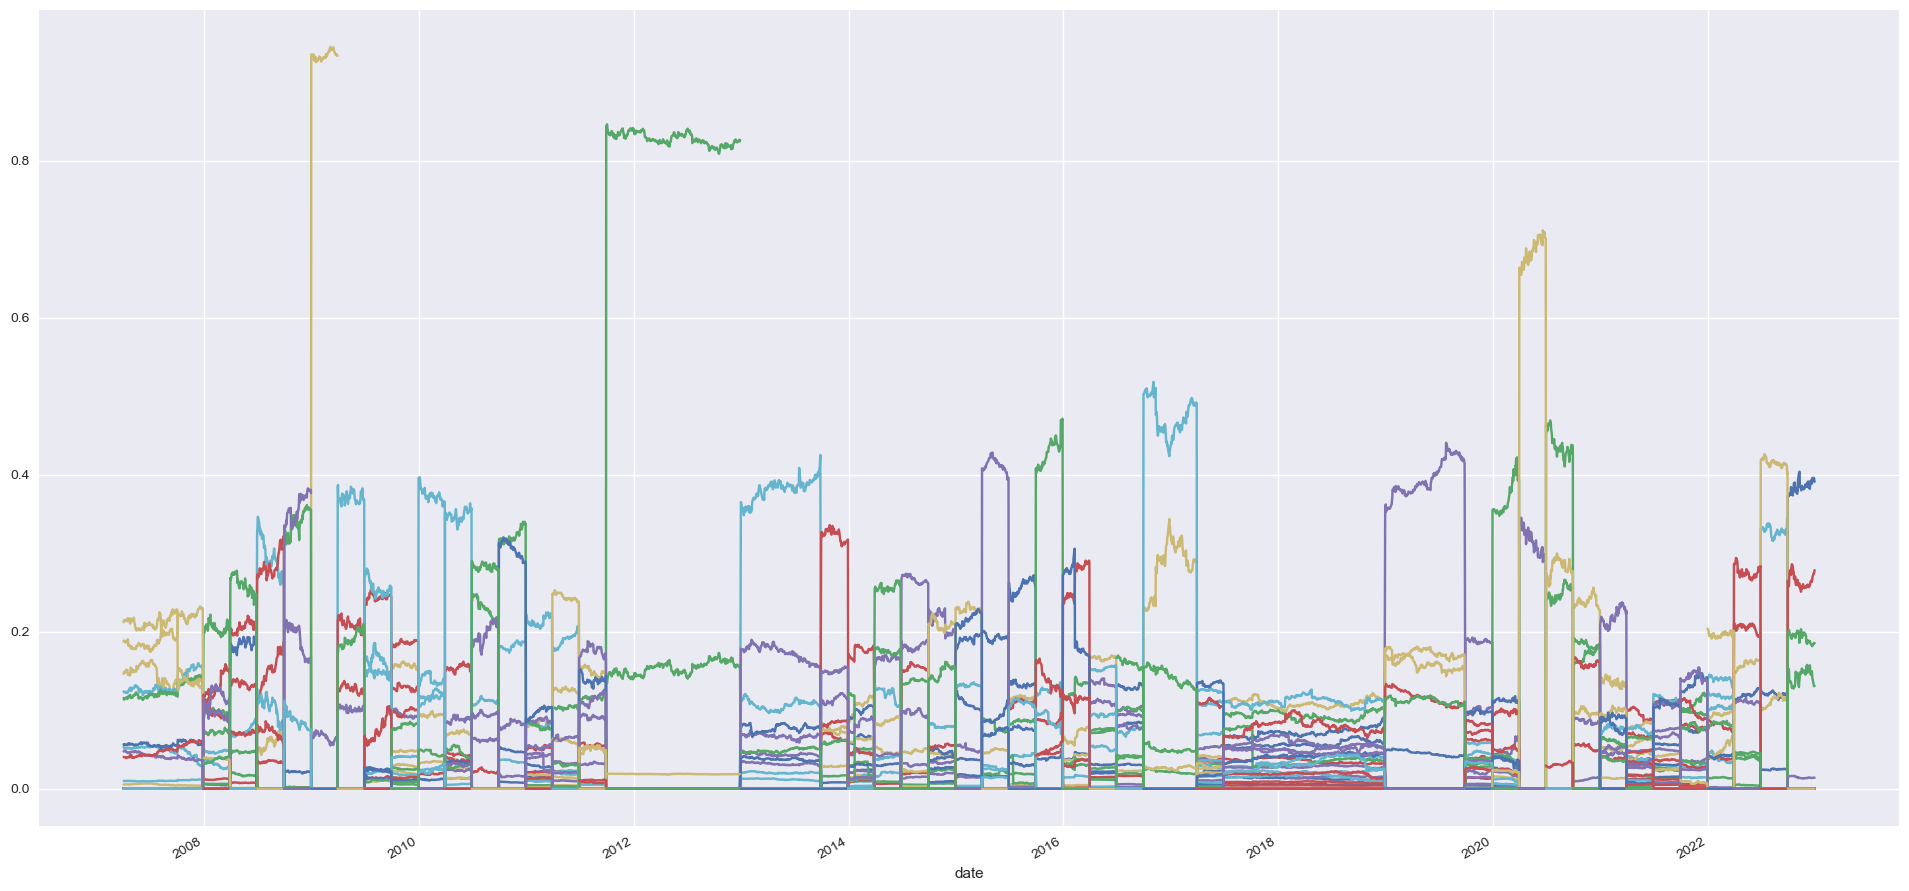

In [9]:
b2.plot(figsize=(24,12), legend=False);